In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
max_len = 0
for w in words:
    if len(w) > max_len:
        max_len = len(w)

max_len

15

In [6]:
counts = dict()

for w in words:
    chs = ["<s>"] + list(w) + ["<e>"]
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        counts[bigram] = counts.get(bigram,0) + 1
        # print(ch1, ch2)


In [7]:
counts.items()

dict_items([(('<s>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<e>'), 6640), (('<s>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<s>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<s>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<s>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<s>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<e>'), 3983), (('<s>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<s>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<e>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

Lets turn into an array

In [8]:
import torch

In [9]:
N = torch.zeros((27,27),dtype=torch.int32)

In [10]:
N[0,0]

tensor(0, dtype=torch.int32)

In [11]:

chars = sorted(list(set("".join(words))))
char_to_int = dict()

for i in range (len(chars)):
    char_to_int[chars[i]] = i + 1

char_to_int["."] = 0
int_to_chars = ["."]+chars
char_to_int


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [12]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        ind1 = char_to_int[ch1]
        ind2 = char_to_int[ch2]
        N[ind1,ind2] += 1

In [13]:
N[:10,:10]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674],
        [3983,  679,  121,  153,  384, 1271,   82,  125,  152,  818],
        [  80,  242,    0,    0,    0,  123,   44,    1,    1,  160],
        [ 108,  330,    3,    0,   19,  334,    1,   25,  360,  190],
        [2409, 2244,    8,    2,   24,  674,    2,    2,    1,  729],
        [2489, 2445,  110,  509,  440, 1653,  101,  428,   95,   82]],
       dtype=torch.int32)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
len(int_to_chars)
int_to_chars

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

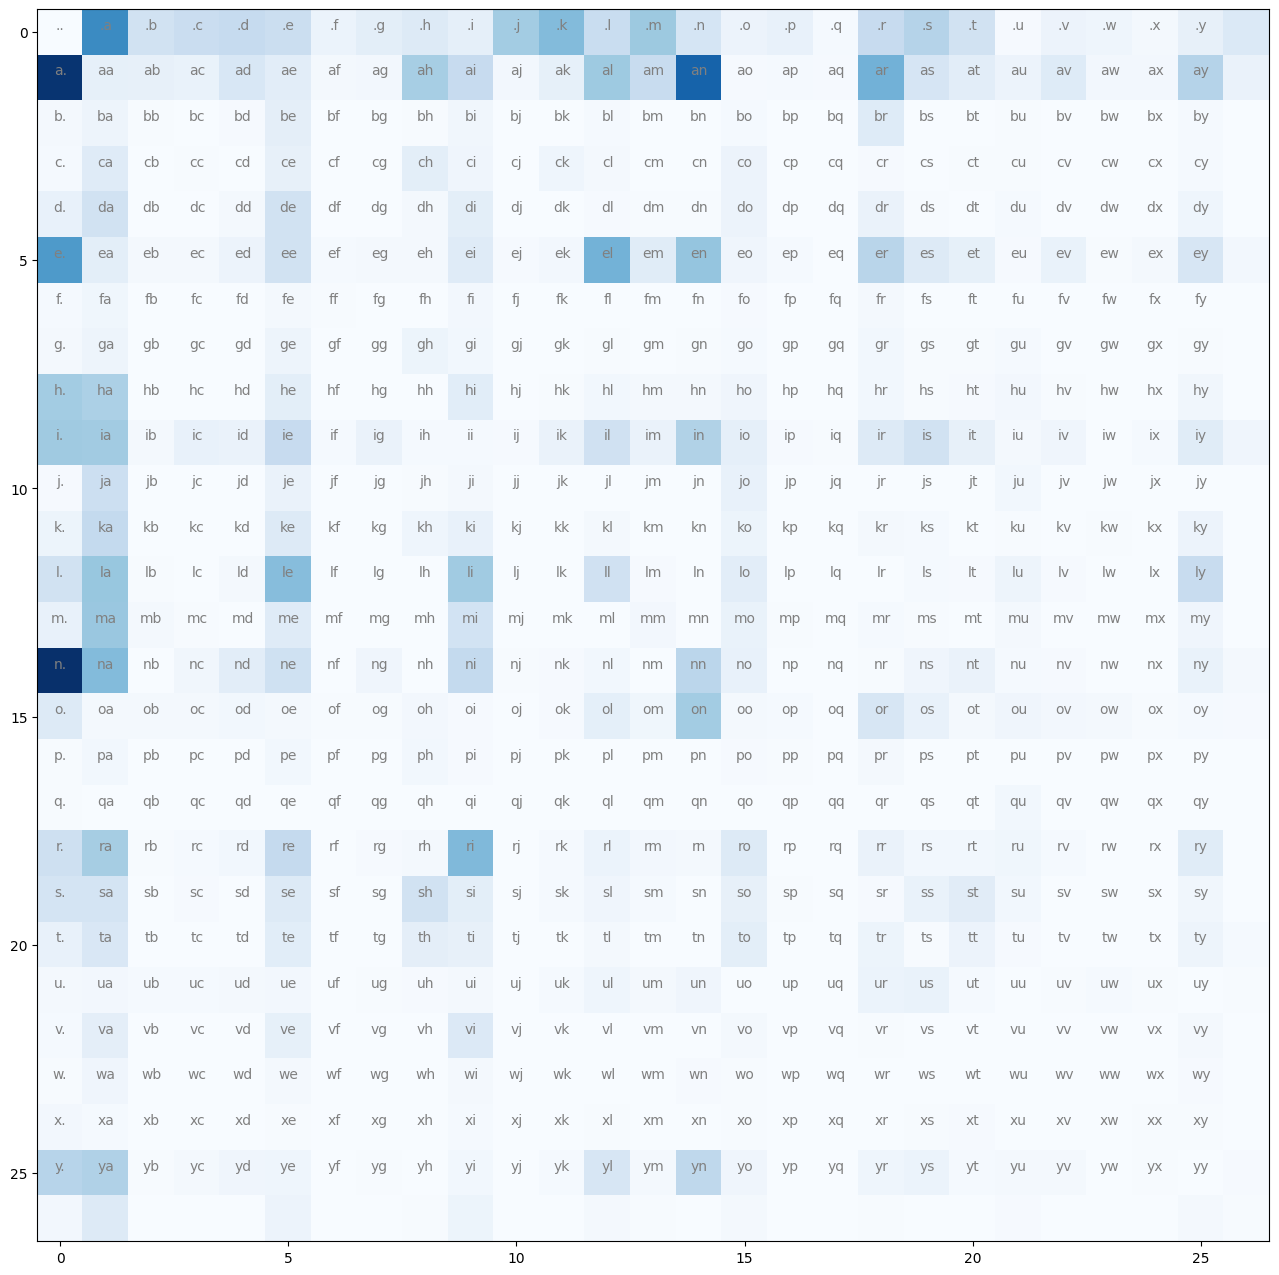

In [16]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(26):
    for j in range(26):
        txt = int_to_chars[i] + int_to_chars[j]
        plt.text(j, i, txt, ha="center",va="bottom",color="gray")
        # print(txt)

In [17]:
#Classic Karpathy, first implement with for loops.

z = torch.zeros((2,10))
z[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
generator = torch.Generator().manual_seed(2147483647)

P = N[0]/torch.sum(N[0])

names = ""
for n in range(10):
    char_row = 0
    name = ""
    for i in range(100):
        P = N[char_row]/torch.sum(N[char_row])
        # P = torch.ones(26)
        sampled_char = torch.multinomial(P, 1, replacement=True, generator=generator).item()
        name += int_to_chars[sampled_char]
        char_row = sampled_char
        if sampled_char == 0:
            break

    names += name + "\n"

print(names)


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.



In [21]:
#and now vectorise with broadcasting!
# dim is the dimension to reduce to 1
# print(N.shape)
# print(torch.sum(N, dim=(1), keepdim=True).shape)
print(N.dtype)
P = N/N.sum(dim=(1),keepdim=True)
print(P.dtype)
# P[0].sum()

names = ""
for n in range(10):
    char_row = 0
    name = ""
    for i in range(100):
        sampled_char = torch.multinomial(P[char_row], 1, replacement=True, generator=generator).item()
        name += int_to_chars[sampled_char]
        char_row = sampled_char
        if sampled_char == 0:
            break

    names += name + "\n"

print(names)


torch.int32
torch.float32
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.



In [180]:
#Ok so how good is our model?
# If we can measure how good it is, then we can anctually optimise it!
# One thing we could do is maximum likelihood estimation. A good model is one for which the data is likely!
# ie. The actual data should be high probability.

loss = 0
count = 0
for w in words:
# for w in ["zach"]:

    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):

        ind1 = char_to_int[ch1]
        ind2 = char_to_int[ch2]
        prob = P[ind1,ind2] 
        logprob = torch.log(prob)
        loss += logprob
        count += 1
        print("{}{} {:.1f} {:.1f}".format(ch1,ch2, prob*100,logprob))


print(-loss/count)

#if the model didn't learn anything the prob would be
print(1/27 * 100)

.e 4.8 -3.0
em 3.8 -3.3
mm 2.5 -3.7
ma 39.0 -0.9
a. 19.6 -1.6
.o 1.2 -4.4
ol 7.8 -2.6
li 17.8 -1.7
iv 1.5 -4.2
vi 35.4 -1.0
ia 13.8 -2.0
a. 19.6 -1.6
.a 13.8 -2.0
av 2.5 -3.7
va 25.0 -1.4
a. 19.6 -1.6
.i 1.8 -4.0
is 7.4 -2.6
sa 14.8 -1.9
ab 1.6 -4.1
be 24.8 -1.4
el 15.9 -1.8
ll 9.6 -2.3
la 18.8 -1.7
a. 19.6 -1.6
.s 6.4 -2.7
so 6.6 -2.7
op 1.2 -4.4
ph 19.9 -1.6
hi 9.6 -2.3
ia 13.8 -2.0
a. 19.6 -1.6
.c 4.8 -3.0
ch 18.8 -1.7
ha 29.5 -1.2
ar 9.6 -2.3
rl 3.3 -3.4
lo 5.0 -3.0
ot 1.5 -4.2
tt 6.7 -2.7
te 12.9 -2.1
e. 19.5 -1.6
.m 7.9 -2.5
mi 18.9 -1.7
ia 13.8 -2.0
a. 19.6 -1.6
.a 13.8 -2.0
am 4.8 -3.0
me 12.3 -2.1
el 15.9 -1.8
li 17.8 -1.7
ia 13.8 -2.0
a. 19.6 -1.6
.h 2.7 -3.6
ha 29.5 -1.2
ar 9.6 -2.3
rp 0.1 -6.8
pe 19.2 -1.7
er 9.6 -2.3
r. 10.8 -2.2
.e 4.8 -3.0
ev 2.3 -3.8
ve 22.1 -1.5
el 15.9 -1.8
ly 11.4 -2.2
yn 18.7 -1.7
n. 36.9 -1.0
.a 13.8 -2.0
ab 1.6 -4.1
bi 8.2 -2.5
ig 2.4 -3.7
ga 17.1 -1.8
ai 4.9 -3.0
il 7.6 -2.6
l. 9.4 -2.4
.e 4.8 -3.0
em 3.8 -3.3
mi 18.9 -1.7
il 7.6 -2.6
ly 11.4 -2.

In [32]:
# Ok we are going to now frame this in the neural network framework. 
# Instead of explictily building a model, we will learn it!

# Create dataset

xs, ys = [], []

for w in words[:1]:

    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):

        ind1 = char_to_int[ch1]
        ind2 = char_to_int[ch2]
        xs.append(ind1)
        ys.append(ind2)

        print("{}{}".format(ch1,ch2))

xs = torch.tensor(xs)
ys = torch.tensor(ys)

.e
em
mm
ma
a.


In [33]:
print(xs)
print(ys)
#problem is that we cannot feed in integers into a neural net..... one hot encode!!!

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [30]:
import torch.nn.functional as F


In [39]:
xenc = F.one_hot(xs, num_classes=27).float()

In [40]:
print(xenc)
print(xenc.shape)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([5, 27])


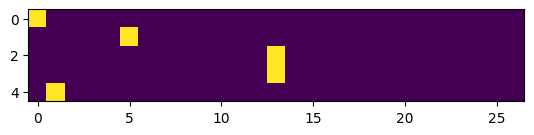

In [41]:
plt.imshow(xenc)

In [43]:
# BE CAREFUL WITH DATA TYPES!!!!
# For weights we want float32
xenc.dtype

torch.float32

In [48]:
W = torch.normal(mean=0,std=1, size=(27,1))
xenc @ W

tensor([[-0.7553],
        [ 1.8238],
        [-1.0102],
        [-1.0102],
        [-0.2337]])

In [55]:
W = torch.normal(mean=0,std=1, size=(27,27))
logits = xenc @ W
counts = logits.exp()
print(logits[:1])
print(counts[:1])


tensor([[-0.5321,  0.5714,  0.9399,  0.6764,  0.1766,  0.2998, -0.7659,  0.3769,
         -0.4256, -0.2957, -0.1006, -0.3578, -0.6848,  0.4947,  1.6439,  0.0887,
          1.6495, -1.2999,  1.0067,  0.2635, -0.1824, -0.3044,  0.1645, -1.8440,
          1.8638, -0.0730,  0.8478]])
tensor([[0.5874, 1.7707, 2.5597, 1.9668, 1.1931, 1.3496, 0.4649, 1.4578, 0.6534,
         0.7440, 0.9043, 0.6992, 0.5042, 1.6400, 5.1754, 1.0928, 5.2042, 0.2726,
         2.7366, 1.3014, 0.8333, 0.7375, 1.1788, 0.1582, 6.4480, 0.9296, 2.3345]])


In [58]:
counts /= counts.sum(dim=1,keepdim=True)
print(counts[:1])
print(counts[:1].sum())

tensor([[0.0131, 0.0394, 0.0570, 0.0438, 0.0266, 0.0301, 0.0104, 0.0325, 0.0146,
         0.0166, 0.0201, 0.0156, 0.0112, 0.0365, 0.1153, 0.0243, 0.1159, 0.0061,
         0.0610, 0.0290, 0.0186, 0.0164, 0.0263, 0.0035, 0.1436, 0.0207, 0.0520]])
tensor(1.)


In [173]:
# DATA SETUP
xs, ys = [], []

for w in words:

    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):

        ind1 = char_to_int[ch1]
        ind2 = char_to_int[ch2]
        xs.append(ind1)
        ys.append(ind2)

        # print("{}{}".format(ch1,ch2))

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num_examples = len(xs)
print("Num of examples: ", num_examples)

Num of examples:  228146


In [174]:
# MODEL INIT
W = torch.normal(mean=0,std=1, size=(27,27), requires_grad=True)

In [184]:
for i in range(100):
    # FORWARD PASS
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(dim=1,keepdim=True)
    loss = torch.mean(-torch.log(probs[torch.arange(num_examples),ys]))
    print(loss)
    
    # BACKWARD PASS
    W.grad = None
    loss.backward()
    W.data += -10 * W.grad


tensor(2.4785, grad_fn=<MeanBackward0>)
tensor(2.4784, grad_fn=<MeanBackward0>)
tensor(2.4784, grad_fn=<MeanBackward0>)
tensor(2.4783, grad_fn=<MeanBackward0>)
tensor(2.4782, grad_fn=<MeanBackward0>)
tensor(2.4781, grad_fn=<MeanBackward0>)
tensor(2.4781, grad_fn=<MeanBackward0>)
tensor(2.4780, grad_fn=<MeanBackward0>)
tensor(2.4779, grad_fn=<MeanBackward0>)
tensor(2.4779, grad_fn=<MeanBackward0>)
tensor(2.4778, grad_fn=<MeanBackward0>)
tensor(2.4777, grad_fn=<MeanBackward0>)
tensor(2.4776, grad_fn=<MeanBackward0>)
tensor(2.4776, grad_fn=<MeanBackward0>)
tensor(2.4775, grad_fn=<MeanBackward0>)
tensor(2.4774, grad_fn=<MeanBackward0>)
tensor(2.4774, grad_fn=<MeanBackward0>)
tensor(2.4773, grad_fn=<MeanBackward0>)
tensor(2.4772, grad_fn=<MeanBackward0>)
tensor(2.4772, grad_fn=<MeanBackward0>)
tensor(2.4771, grad_fn=<MeanBackward0>)
tensor(2.4770, grad_fn=<MeanBackward0>)
tensor(2.4770, grad_fn=<MeanBackward0>)
tensor(2.4769, grad_fn=<MeanBackward0>)
tensor(2.4768, grad_fn=<MeanBackward0>)


In [162]:
# Trigam Linear Model
# For bigram input was [1,27] vector to [1,27] pred
# for trigram input [2,27] vector to [1,27] pred. As I stack multiple together, I will get [2,27,X] to [1,27,X]
# First layer on neural net... 2*27 weights to 1 nueron. 27 neurons needed for each class. 
# I could also stack the input vector into a single dimension...



In [229]:
 # DATA SETUP

#Encoder/Decoder
chars = sorted(list(set("".join(words))))
char_to_int = dict()

for i in range (len(chars)):
    char_to_int[chars[i]] = i + 1

char_to_int["."] = 0
int_to_chars = ["."]+chars
print(char_to_int)

xs, ys = [], []

for w in words:

    chs = ["."] + ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs,chs[1:],chs[2:]):

        ind1 = char_to_int[ch1]
        ind2 = char_to_int[ch2]
        ind3 = char_to_int[ch3]

        xs.append([ind1,ind2])
        ys.append(ind3)

        print("{}{}{}".format(ch1,ch2,ch3))

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num_examples = len(xs)
print("Num of examples: ", num_examples)
print(xs)
print(ys)
xenc = F.one_hot(xs, num_classes=27).reshape(num_examples,54).float()
print(xenc.shape)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
..e
.em
emm
mma
ma.
..o
.ol
oli
liv
ivi
via
ia.
..a
.av
ava
va.
..i
.is
isa
sab
abe
bel
ell
lla
la.
..s
.so
sop
oph
phi
hia
ia.
..c
.ch
cha
har
arl
rlo
lot
ott
tte
te.
..m
.mi
mia
ia.
..a
.am
ame
mel
eli
lia
ia.
..h
.ha
har
arp
rpe
per
er.
..e
.ev
eve
vel
ely
lyn
yn.
..a
.ab
abi
big
iga
gai
ail
il.
..e
.em
emi
mil
ily
ly.
..e
.el
eli
liz
iza
zab
abe
bet
eth
th.
..m
.mi
mil
ila
la.
..e
.el
ell
lla
la.
..a
.av
ave
ver
ery
ry.
..s
.so
sof
ofi
fia
ia.
..c
.ca
cam
ami
mil
ila
la.
..a
.ar
ari
ria
ia.
..s
.sc
sca
car
arl
rle
let
ett
tt.
..v
.vi
vic
ict
cto
tor
ori
ria
ia.
..m
.ma
mad
adi
dis
iso
son
on.
..l
.lu
lun
una
na.
..g
.gr
gra
rac
ace
ce.
..c
.ch
chl
hlo
loe
oe.
..p
.pe
pen
ene
nel
elo
lop
ope
pe.
..l
.la
lay
ayl
yla
la.
..r
.ri
ril
ile
ley
ey.
..z
.zo
zo

In [230]:
# MODEL INIT
W = torch.normal(mean=0,std=1, size=(54,27), requires_grad=True)


In [235]:
for i in range(1000):
    # FORWARD PASS
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(dim=1,keepdim=True)
    loss = torch.mean(-torch.log(probs[torch.arange(num_examples),ys]))
    print(loss.item())
    
    # BACKWARD PASS
    W.grad = None
    loss.backward()
    W.data += -20 * W.grad


2.362802267074585
2.3626811504364014
2.362560987472534
2.3624417781829834
2.362323522567749
2.3622066974639893
2.3620901107788086
2.3619751930236816
2.361860752105713
2.3617472648620605
2.3616347312927246
2.361523151397705
2.361412286758423
2.361302375793457
2.3611934185028076
2.3610851764678955
2.3609776496887207
2.3608715534210205
2.3607656955718994
2.360661029815674
2.3605568408966064
2.3604538440704346
2.360351324081421
2.3602495193481445
2.3601486682891846
2.360048770904541
2.3599493503570557
2.3598506450653076
2.359752893447876
2.3596556186676025
2.3595595359802246
2.359463930130005
2.3593688011169434
2.3592746257781982
2.3591811656951904
2.3590879440307617
2.3589959144592285
2.3589046001434326
2.358813762664795
2.3587234020233154
2.3586337566375732
2.3585450649261475
2.35845685005188
2.3583691120147705
2.3582823276519775
2.3581960201263428
2.3581104278564453
2.358025074005127
2.357940673828125
2.3578569889068604
2.3577733039855957
2.3576908111572266
2.3576087951660156
2.35752701

In [239]:
blank_prompt = F.one_hot(torch.tensor([0,0]), num_classes=27).reshape(1,54).float()
blank_prompt.dtype


torch.float32

In [261]:
# Generation

names = ""
for n in range(10):
    prev_chars = [0,0]
    name = ""
    for i in range(100):
        prev_chars_enc = F.one_hot(torch.tensor(prev_chars), num_classes=27).reshape(1,54).float()
        logits = prev_chars_enc @ W
        counts = logits.exp()
        probs = counts/counts.sum(dim=1,keepdim=True)
        # probs = torch.ones(27)
        sampled_char = torch.multinomial(probs, 1, replacement=True, generator=generator).item()
        name += int_to_chars[sampled_char]
        prev_chars = [prev_chars[1],sampled_char]
        if sampled_char == 0:
            break

    names += name + "\n"

print(names)

ani.
jires.
key.
freyne.
dricassyah.
ciah.
lmiy.
hallini.
dai.
amila.

